# **Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/'My Drive'/Colab\ Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
df = pd.read_csv('train_E6oV3lV.csv')

In [ ]:
df = df[:2000]

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
Negative_tweets=0
Positive_tweets=0
for label in df['label']:
  if(label==0):
    Negative_tweets+=1
  else:
    Positive_tweets+=1

print("Negative Tweets : ",Negative_tweets)
print("Positive Tweets : ",Positive_tweets)
print("Total Tweets : ",len(df["label"]))

Negative Tweets :  1855
Positive Tweets :  145
Total Tweets :  2000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


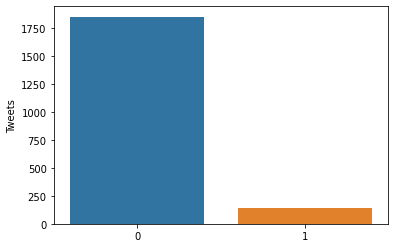

In [ ]:
x=[0,1]
y=[Negative_tweets,Positive_tweets]
sns.barplot(x,y)
plt.ylabel("Tweets")
plt.show()

**Removing Twitter Handles (@user)**

In [ ]:
#combined = train.append(test, ignore_index=True)  #Combined training and test data
combined=df

In [ ]:
combined

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
1995,1996,0,sho film i made on my relationship with caffei...
1996,1997,0,@user one the flowers i planted as a seed blo...
1997,1998,1,@user riyadh is renowned for some of the deadl...
1998,1999,0,@user ooohhh. im busy with my internship here ...


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [ ]:
# remove twitter handles (@user)
combined['tidy_tweet'] = np.vectorize(remove_pattern)(combined['tweet'], "@[\w]*")

**Removing Punctuations, Numbers, and Special Characters**

In [ ]:
# remove special characters, numbers, punctuations
combined['tidy_tweet'] = combined['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
combined['tidy_tweet']

0         when a father is dysfunctional and is so sel...
1         thanks for #lyft credit i can t use cause th...
2                                     bihday your majesty
3       #model   i love u take with u all the time in ...
4                  factsguide  society now    #motivation
                              ...                        
1995    sho film i made on my relationship with caffei...
1996      one the flowers i planted as a seed bloomed ...
1997     riyadh is renowned for some of the deadliest ...
1998     ooohhh  im busy with my internship here in la...
1999     coolestlifehack  this is what a porcupine fis...
Name: tidy_tweet, Length: 2000, dtype: object

**Tokenization**

In [ ]:
tokenized_tweet = combined['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combined['tidy_tweet'] = tokenized_tweet

**Visualization from Tweets**

**Understanding the common words used in the tweets**

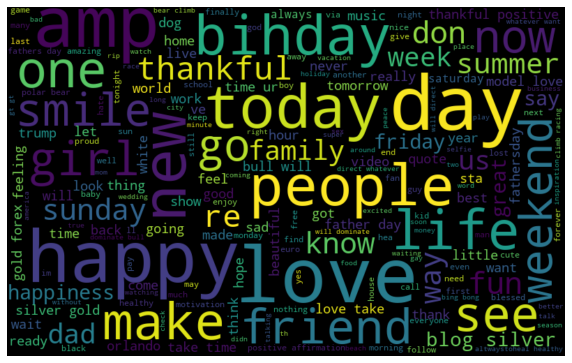

In [ ]:
all_words = ' '.join([text for text in combined['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Words in non racist/sexist tweets**

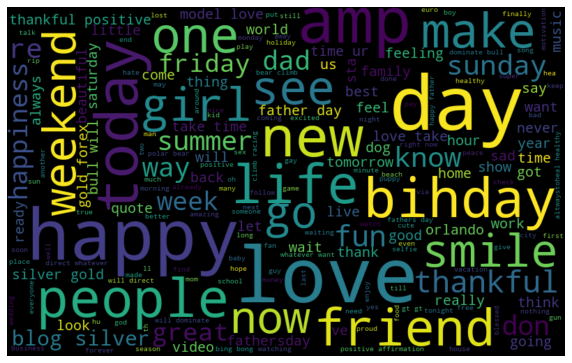

In [ ]:
normal_words =' '.join([text for text in combined['tidy_tweet'][combined['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Racist/Sexist Tweets**

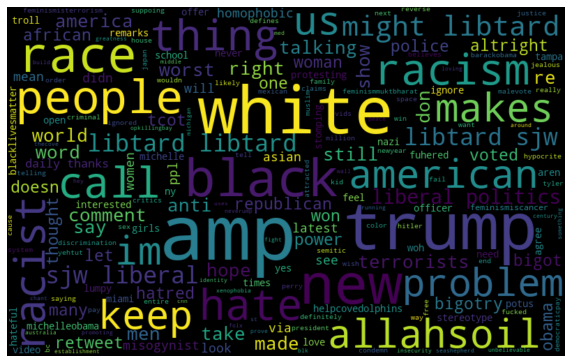

In [ ]:

negative_words = ' '.join([text for text in combined['tidy_tweet'][combined['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Understanding the impact of Hashtags on tweets sentiment**

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combined['tidy_tweet'][combined['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combined['tidy_tweet'][combined['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

**Non-Racist/Sexist Tweets**

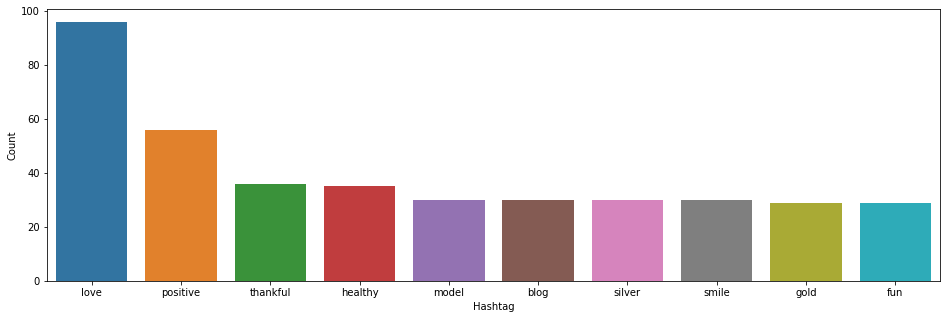

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

**Racist/Sexist Tweets**

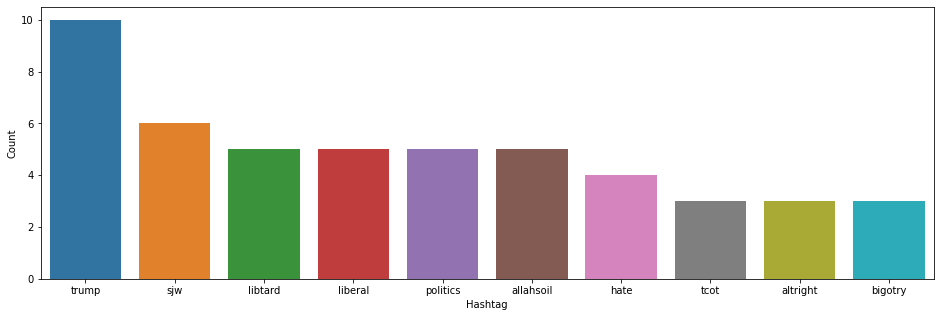

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# **Model Building: Sentiment Analysis**

**Extracting Features from Cleaned Tweets**

**Bag-of-Words Features**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english' )
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combined['tidy_tweet'])

In [ ]:
np.shape(bow)

(2000, 1000)

**TF-IDF Features**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizera(max_df=0.90, min_df=2, max_features=1000, stop_words='english' )
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combined['tidy_tweet'])

In [ ]:
np.shape(tfidf)

(2000, 1000)

**Bag of Words**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow,df['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
actual=[]
for i in yvalid:
  actual.append(i)
count = 0
for i in range(len(prediction_int)):
  if(prediction_int[i] == actual[i]):
    count = count + 1
print("The accuracy is: ", count/len(prediction_int)*100) # predicted the accuracy of the system by Comparing the original label of the test data with the predicted label. 
                                                        #Multiplied it with the 100 to get the accuracy in percentage.
# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, prediction_int, pos_label=1)

cm = confusion_matrix(actual, prediction_int)                 #confusion matrix is printing how many true positive and true negative the classifier has able to identify
cr = classification_report(actual, prediction_int)
acc = accuracy_score(actual, prediction_int)

# Measuring the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

print("The report for the same is below: -")
print(cr)
print("The confusion matrix for the same is below: -")
print(cm)

The accuracy is:  95.0
AUC of the predictions: 0.6830357142857143
The report for the same is below: -
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       560
           1       0.75      0.38      0.50        40

    accuracy                           0.95       600
   macro avg       0.85      0.68      0.74       600
weighted avg       0.94      0.95      0.94       600

The confusion matrix for the same is below: -
[[555   5]
 [ 25  15]]


In [ ]:
train_tfidf = tfidf[:31962,:]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, df['label'], random_state=42, test_size=0.3)

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.24999999999999997

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
actual=[]
for i in yvalid:
  actual.append(i)
count = 0
for i in range(len(prediction_int)):
  if(prediction_int[i] == actual[i]):
    count = count + 1
print("The accuracy is: ", count/len(prediction_int)*100) # predicted the accuracy of the system by Comparing the original label of the test data with the predicted label. 
                                                        #Multiplied it with the 100 to get the accuracy in percentage.
# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, prediction_int, pos_label=1)

cm = confusion_matrix(actual, prediction_int)                 #confusion matrix is printing how many true positive and true negative the classifier has able to identify
cr = classification_report(actual, prediction_int)
acc = accuracy_score(actual, prediction_int)

# Measuring the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

print("The report for the same is below: -")
print(cr)
print("The confusion matrix for the same is below: -")
print(cm)

The accuracy is:  94.0
AUC of the predictions: 0.5732142857142857
The report for the same is below: -
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       560
           1       0.75      0.15      0.25        40

    accuracy                           0.94       600
   macro avg       0.85      0.57      0.61       600
weighted avg       0.93      0.94      0.92       600

The confusion matrix for the same is below: -
[[558   2]
 [ 34   6]]


**LSTM and CNN**

In [ ]:
df=pd.read_csv("train_E6oV3lV.csv")

In [ ]:
df1 = df[:2000]

In [ ]:
a = list(df1['label'])

In [ ]:
sum(a)

145

In [ ]:
df = df1

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
##To get Total Number of Tweets, Total Positive Tweets and Total Negative Tweets
nltk.download('punkt')

def word_vocab(document):
  data = document['tweet']
  words = [nltk.word_tokenize(word.lower()) for word in data] 
  wordsList = [item.strip() for sublist in words for item in sublist]
  return wordsList

def preprocess(document):
    #code goes here
  words = word_vocab(document)
  a=[]
  positiveCount =0
  negativeCount =0
  totalWordList = len(set(words)) 
  print("Total number of vocabulary number is: ", totalWordList)    #Total number of tweets words in the text file
  dataTypes = document['label']
  for i in range(len(dataTypes)):
    if(dataTypes[i] == 1):
      positiveCount = positiveCount + 1                 #positive Examples Count
    else :
      negativeCount = negativeCount + 1                 #Negative Examples Count
  negative_text_count = negativeCount
  positive_text_count = positiveCount
  print("Number of Positive examples is :", positive_text_count)
  print("Number of Negative examples is :", negative_text_count)
  #return words
preprocess(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total number of vocabulary number is:  7150
Number of Positive examples is : 145
Number of Negative examples is : 1855


**Naive Bayes Classifier**

In [ ]:
from collections import Counter

dictionary = {}
# analysing the text data of test set and build on the vocabulary and the frequency based on the training dataset by the model
def predictClassWord(text, counts, class_prob, class_count):
  prediction = 1
  sentence = text[2]
  text_counts = Counter(sentence)
  for word in text_counts:
      prediction *=  text_counts.get(word) * ((counts.get(word,0) + 1) / (sum(counts.values()) + class_count))
  return prediction * class_prob

#used the counter to make the frequency and train data set bag-of-words set
def counter_for_text(text):
  return Counter(text)


#dataset has been build based on bag-of-words model and returned the probability of 
#negative class and positive class, number of negative words and positive words, negative sentence and positive sentence.
def prediction(document,train):
  a=[]
  positiveTextWords=[]
  negativeTextWords = []
  positiveCount =0
  negativeCount =0
  for i in range(len(train)):
    if(train[i][1] == 1):
      positiveCount = positiveCount + 1 
      positiveTextWords.append(train[i][2])
    else :
      negativeCount = negativeCount + 1
      negativeTextWords.append(train[i][2])
  negative_text_count = negativeCount
  positive_text_count = positiveCount
  
  
  wordsListPositive = [item.strip() for sublist in positiveTextWords for item in sublist]
  wordsListNegative = [item.strip() for sublist in negativeTextWords for item in sublist]
  
  #list of all the words
  ab=[]
  for i in range(len(train)):
    ab.append(train[i][2])
  wordsList = [item.strip() for sublist in ab for item in sublist]
  
  
  prob_positive = positive_text_count / len(train)#totalWordList
  prob_negative = negative_text_count / len(train)#totalWordList
  
  print("Probability of Positive Words : ",prob_positive)
  print("Probability of Neagative Words : ",prob_negative)
  
  negative_counts = counter_for_text(wordsListNegative)
  positive_counts = counter_for_text(wordsListPositive)
  #This is needed for smoothing
  negativeWordCount = len(set(wordsListNegative))
  positiveWordCount = len(set(wordsListPositive))
  print("Count of Negative Words : ",negativeWordCount)
  print("Count of Positive Words : ",positiveWordCount)
  
  return negative_counts,positive_counts,prob_negative,prob_positive,negativeWordCount,positiveWordCount  
#negative_text_count,positive_text_count
#prediction(df)

In [ ]:
#split the dataset in the tupple format. split the data into 66.666 and 33.333 
data_list = []

for i in range(0,len(df)):
  tup = (int(df.iloc[i,:]['id']),
         int(df.iloc[i,:]["label"]),
         nltk.word_tokenize(df.iloc[i,:]["tweet"].rstrip().lower())
        )
  data_list.append(tup)

In [ ]:
#data_list = np.array(data_list)

In [ ]:
np.shape(data_list)


(2000, 3)

In [ ]:
#data_list[:,2]

In [ ]:
from sklearn.model_selection import train_test_split 
train,test = train_test_split(data_list, test_size=0.3, random_state=1)

In [ ]:
#test[:,1]

In [ ]:
#function give the classic classifier model test data based on which the model will predict whether the tweet is racist or non racist
def outputDecision(text,negative_counts,prob_negative,negative_text_count,positive_counts,prob_positive,positive_text_count):
  a=[]
  negativePrediction = predictClassWord(text, negative_counts, prob_negative, negative_text_count)
  positivePrediction = predictClassWord(text, positive_counts, prob_positive, positive_text_count)
  
  if(negativePrediction > positivePrediction):
    a.append(1)
    return 0
  return 1

In [ ]:
#This is to call the train function to train the model
trainData = prediction(df,train)

Probability of Positive Words :  0.07071428571428572
Probability of Neagative Words :  0.9292857142857143
Count of Negative Words :  5209
Count of Positive Words :  728


In [ ]:
#Called prediction function with the test data.
predictions = [outputDecision(r,trainData[0],trainData[2],trainData[4],trainData[1],trainData[3],trainData[5]) for r in test]

In [ ]:

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
actual=[]
for i in test:
  actual.append(i[1])
count = 0
for i in range(len(predictions)):
  if(predictions[i] == actual[i]):
    count = count + 1
print("The accuracy is: ", count/len(predictions)*100) # predicted the accuracy of the system by Comparing the original label of the test data with the predicted label. 
                                                        #Multiplied it with the 100 to get the accuracy in percentage.
# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)

cm = confusion_matrix(actual, predictions)                 #confusion matrix is printing how many true positive and true negative the classifier has able to identify
cr = classification_report(actual, predictions)
acc = accuracy_score(actual, predictions)

# Measuring the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

print("The report for the same is below: -")
print(cr)
print("The confusion matrix for the same is below: -")
print(cm)

The accuracy is:  22.166666666666668
AUC of the predictions: 0.5785198555956679
The report for the same is below: -
              precision    recall  f1-score   support

           0       1.00      0.16      0.27       554
           1       0.09      1.00      0.16        46

    accuracy                           0.22       600
   macro avg       0.54      0.58      0.22       600
weighted avg       0.93      0.22      0.26       600

The confusion matrix for the same is below: -
[[ 87 467]
 [  0  46]]


**RNN Sequence Model stacked with LSTM for Classification**

In [ ]:
np.shape(train) , np.shape(test) 


((1400, 3), (600, 3))

In [ ]:
t = test

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import numpy as np

#Split data 
train, test =train,test   #train , test = train_test_split(train, test_size=0.33, random_state=1) # #task3()

def make_dictionary(train, test):
    dictionary = {}
    for d in train+test:
        for w in d[2]:
            if w not in dictionary:
                dictionary[w] = len(dictionary)
    return dictionary

class KerasBatchGenerator(object):
    def __init__(self, data, num_steps, batch_size, vocabulary, skip_step=5):
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        self.current_idx = 0
        self.current_sent = 0
        self.skip_step = skip_step

    def generate(self):
        x = np.zeros((self.batch_size, self.num_steps))
        y = np.zeros((self.batch_size, self.num_steps, 2))
        while True:
            for i in range(self.batch_size):
                # Choose a sentence and position with at lest num_steps more words
                while self.current_idx + self.num_steps >= len(self.data[self.current_sent][2]):
                    self.current_idx = self.current_idx % len(self.data[self.current_sent][2])
                    self.current_sent += 1
                    if self.current_sent >= len(self.data):
                        self.current_sent = 0
                # The rows of x are set to values like [1,2,3,4,5]
                x[i, :] = [self.vocabulary[w] for w in self.data[self.current_sent][2][self.current_idx:self.current_idx + self.num_steps]]
                # The rows of y are set to values like [[1,0],[1,0],[1,0],[1,0],[1,0]]
                y[i, :, :] = [[self.data[self.current_sent][1], 1-self.data[self.current_sent][1]]] * self.num_steps
                self.current_idx += self.skip_step
            yield x, y

# Hyperparameters for model
vocabulary = make_dictionary(train, test)
num_steps = 5
batch_size = 10
num_epochs = 20         
hidden_size = 10   # Increase this to improve perfomance (or increase for performance)
use_dropout=True

# Create batches for RNN
train_data_generator = KerasBatchGenerator(train, num_steps, batch_size, vocabulary,
                                           skip_step=num_steps )
valid_data_generator = KerasBatchGenerator(test, num_steps, batch_size, vocabulary,
                                           skip_step=num_steps )

# A double stacked LSTM with dropout and n hidden layers
model = Sequential()
model.add(Embedding(len(vocabulary), hidden_size, input_length=num_steps))
model.add(LSTM(hidden_size, return_sequences=True))
\

model.add(LSTM(hidden_size, return_sequences=True))



if use_dropout:
    model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(2)))
model.add(Activation('softmax'))

# Set optimizer and build model
optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# Train the model
model.fit_generator(train_data_generator.generate(), len(train)//(batch_size*num_steps), num_epochs,
                        validation_data=valid_data_generator.generate(),
                        validation_steps=len(test)//(batch_size*num_steps))

# Save the model
print(model.summary())
model.save("final_model.hdf5")

Epoch 1/20
28/28 [==============================] - 1s 30ms/step - loss: 0.6640 - categorical_accuracy: 0.9171 - val_loss: 0.6290 - val_categorical_accuracy: 0.9417
Epoch 2/20
28/28 [==============================] - 0s 8ms/step - loss: 0.6005 - categorical_accuracy: 0.8857 - val_loss: 0.5239 - val_categorical_accuracy: 0.9583
Epoch 3/20
28/28 [==============================] - 0s 8ms/step - loss: 0.4639 - categorical_accuracy: 0.9393 - val_loss: 0.4531 - val_categorical_accuracy: 0.8750
Epoch 4/20
28/28 [==============================] - 0s 7ms/step - loss: 0.3758 - categorical_accuracy: 0.9357 - val_loss: 0.4084 - val_categorical_accuracy: 0.9000
Epoch 5/20
28/28 [==============================] - 0s 8ms/step - loss: 0.3636 - categorical_accuracy: 0.9321 - val_loss: 0.5983 - val_categorical_accuracy: 0.8167
Epoch 6/20
28/28 [==============================] - 0s 9ms/step - loss: 0.4441 - categorical_accuracy: 0.8821 - val_loss: 0.2912 - val_categorical_accuracy: 0.9500
Epoch 7/20
28/2

In [ ]:
model = load_model("final_model.hdf5")

x = np.zeros((1,num_steps))
#x[0,:] = [vocabulary["this"],vocabulary["the"],vocabulary["an"],vocabulary["easy"],vocabulary["test"]]
# print(model.predict(x))
x.shape

(1, 5)

In [ ]:
#code w predicting the text accuracy based on the tweets words. 
#Taken the approach of sentence word probability multiplication. As our classifier is able to predict words proabability o
#on 5 words based, everytime we have divided the sentence into 5 words token and sent 5 words into vocabulary. Then we got the 5 words individual prediction
#of being ironic and non ironic and captured that into matrix.
#Next again we have sent the 5 words based on window feature which like first sending 12345 and then 23456. These are the index positions of the words.
#As we are getting the probability of words of being ironinc and no ironic multiple times, we have multiplied all the probabilities and got the probability of the sentence.

from collections import defaultdict
model = load_model("final_model.hdf5")

predict_label = []

for i in range(len(test)):

    line = test[i][2]

    dictPos = defaultdict(list)

    dictNeg = defaultdict(list)

  
    for i in range(0,len(line)-4):

 

        str_ln = line[i:i+5]

        lin_seg = np.array([vocabulary[i] for i in line[i:i+5]])

        lin_seg = lin_seg.reshape(1,5)

        lin_seg_pred = model.predict(lin_seg)

        lin_seg_pos = lin_seg_pred.reshape(5,2)[:,0:1].flatten()

        lin_seg_neg = lin_seg_pred.reshape(5,2)[:,1:].flatten()

        d_pos = dict(zip(str_ln,lin_seg_pos))

        d_pos = {k: [v] for k, v in d_pos.items()}

        d_neg = dict(zip(str_ln,lin_seg_neg))

        d_neg = {k: [v] for k, v in d_neg.items()}

 

        for k,v in d_pos.items():

            dictPos[k].extend(v)

 

        for k,v in d_neg.items():

            dictNeg[k].extend(v)
   
    multiplyPositive=1

    multiplyNegative=1

    for k,v in dictPos.items():

        for j in v:

            multiplyPositive = multiplyPositive * j

    for k1,v1 in dictNeg.items():

        for i in v1:

            multiplyNegative = multiplyNegative * i

    if(multiplyPositive>multiplyNegative):

        predict_label.append(1)

    else:

        predict_label.append(0)
    
    

In [ ]:
#This code I have written to predict the accuracy of the system. I have compared the original label of the test data with the predicted label. 
#I have multiplied it with the 100 to get the accuracy in percentage.
#I have taken the validation matix like confusion matrix, classification report and area under curver. 
#I have chosen this evalution process to print what is true values are coming from the classification. The AUC curve is giving that my system isgiving area
#between 1 to 0 which is 63.
#The confusion matrix is printing how many true positive and true negative the classifier has able to identify.
#I have also printed the precision and recall and depending on that F-Score so that I can say that based on my true value how many retrieved value are gold
#standard value.
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
#actual = [int(r) for r in y_test]
actual=[]
for i in test:
  actual.append(i[1])
count = 0
for i in range(len(actual)):
  if(predict_label[i] == actual[i]):
    count = count + 1
print(count/len(predict_label)*100)
# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)

cm = confusion_matrix(actual, predictions)  
cr = classification_report(actual, predictions)
acc = accuracy_score(actual, predictions)

# Measure the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

print("The report for the same is below: -")
print(cr)
print("The confusion matrix for the same is below: -")
print(cm)

92.33333333333333
AUC of the predictions: 0.5785198555956679
The report for the same is below: -
              precision    recall  f1-score   support

           0       1.00      0.16      0.27       554
           1       0.09      1.00      0.16        46

    accuracy                           0.22       600
   macro avg       0.54      0.58      0.22       600
weighted avg       0.93      0.22      0.26       600

The confusion matrix for the same is below: -
[[ 87 467]
 [  0  46]]


In [ ]:
import numpy as np
def evaluation(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)
    print("The Confusion matrix is: ")
    print(confmat)

**CNN-LSTM Model**

In [ ]:
#This part is to just see the columns of the dataframe containing the tweeter file.
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
#Here I am making my X value which will then be fitted to scikit learning training test split model
X= df['tweet'].values
X.shape

(2000,)

In [ ]:
#Here I am classiying the sentiment labels for the tweets
y = pd.get_dummies(df['label']).values
y.shape

(2000, 2)

In [ ]:
#I have taken the help of scikit learn liabrary to make training ans test split of 80 - 20 percent. 
#increased the training size.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600,) (400,) (1600, 2) (400, 2)


In [ ]:
#Initialization of the model importing liabraries and mentioning number of epochs,batch size and maximum features
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.layers import Bidirectional

batch_size = 16
epochs = 2
max_features = 10000

In [ ]:
#used standard keras tokenizer model to tokenize the training and test data tweet words which will be then feed to the model. I have used a max_features
#techniques in which I have passed the maximum features that is  highest number of words could be in vocabulary of text.
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
#I have padded the sequence with the use of keras model. I have here padded till the maximum number of words in the vocabulary that is 33.
from keras.preprocessing import sequence
max_words = 33           #This is the number of maximum words in the vocabulary
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


In [ ]:
#Used the architecture of CNN-LSTM model. 
#First embedded with the highest number of words in the vocabulary. Then passed this through CNN layer which has taken the shape as X_train data
#shape. Then passed it thorugh a LSTM layer. This LSTM layer has 100 cells in it,it is  bidirectional to read train more accurately as it will
#learn from forward and backward. 
#Taken activation function as softmax to take the probability of the words of being ironic and non-ironic.
def CnnLstmModel(max_features, embed_dim):
    #np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))   
    model.add(Bidirectional(LSTM(50, dropout=0.2,  recurrent_dropout=0.2)))  #100


    #model.add(LSTM(100, dropout=0.2,  recurrent_dropout=0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
#Fit the training and test data as validation set in the model. My train will be x-train containing the data
#and y-train for the training data label. 
def model_train(model):
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

In [ ]:
# train the model
max_features = 47698         #This is the number of words in the vocabulary that we got in the first question. I have used that part.
embed_dim = 100
model = CnnLstmModel(max_features, embed_dim)
model_train(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 100)           4769800   
_________________________________________________________________
conv1d (Conv1D)              (None, 33, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               33200     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 4,812,834
Trainable params: 4,812,834
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
100/100 - 10s - loss: 0.2940 - accuracy: 0.9269 - val_loss: 0.2516 - val_accuracy: 0.9275
Epoch 2

In [ ]:

import numpy as np
def evaluation(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)
    print("The Confusion matrix is: -")
    print(confmat)

In [ ]:
#This code is written to call the function which will evalute the test data based on the system
evaluation()

Accuracy:	92.5%


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       371
           1       0.46      0.21      0.29        29

    accuracy                           0.93       400
   macro avg       0.70      0.59      0.62       400
weighted avg       0.91      0.93      0.91       400

The Confusion matrix is: -
[[364   7]
 [ 23   6]]


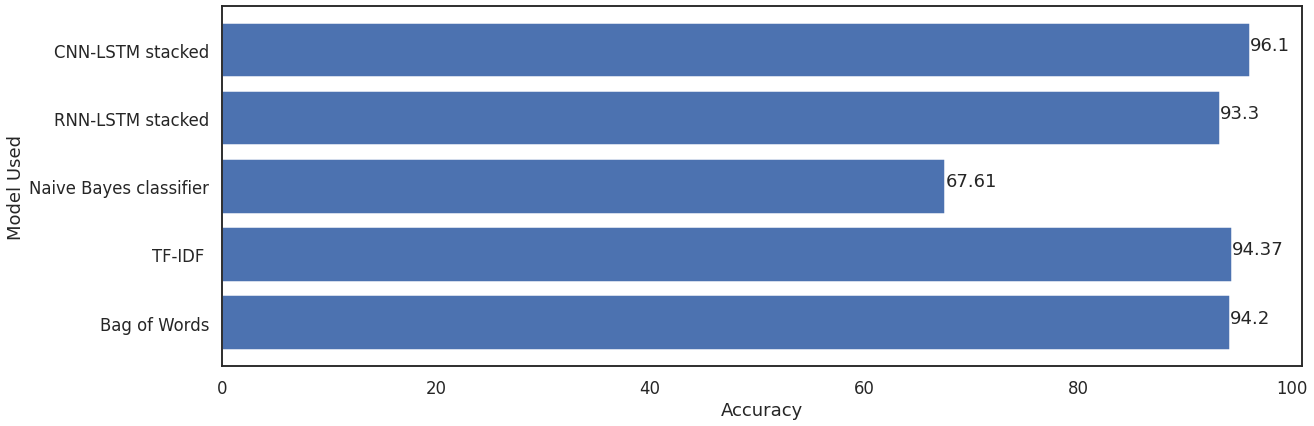

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
x = ['Bag of Words', 'TF-IDF ', 'Naive Bayes classifier', 'RNN-LSTM stacked', 'CNN-LSTM stacked']
y = [94.2,94.37,67.61,93.3,96.1]
ax.barh(langs,students )
plt.ylabel('Model Used')
plt.xlabel('Accuracy')
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

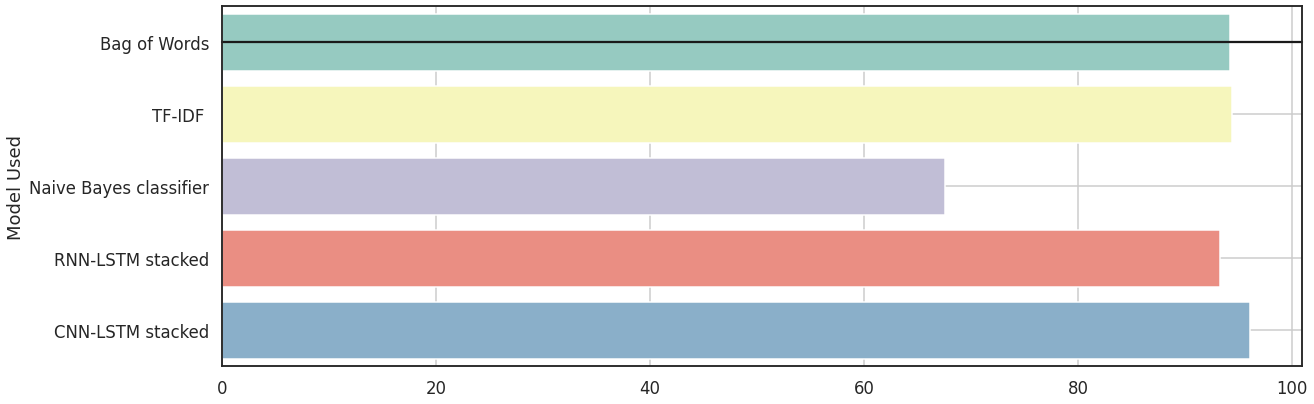

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0,0,1,1])

# Generate some sequential data

sns.barplot(x=y, y=x,  ax=ax1,  palette="Set3")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Accuracy")
ax1.set_ylabel("Model Used")
ax1.grid(True)

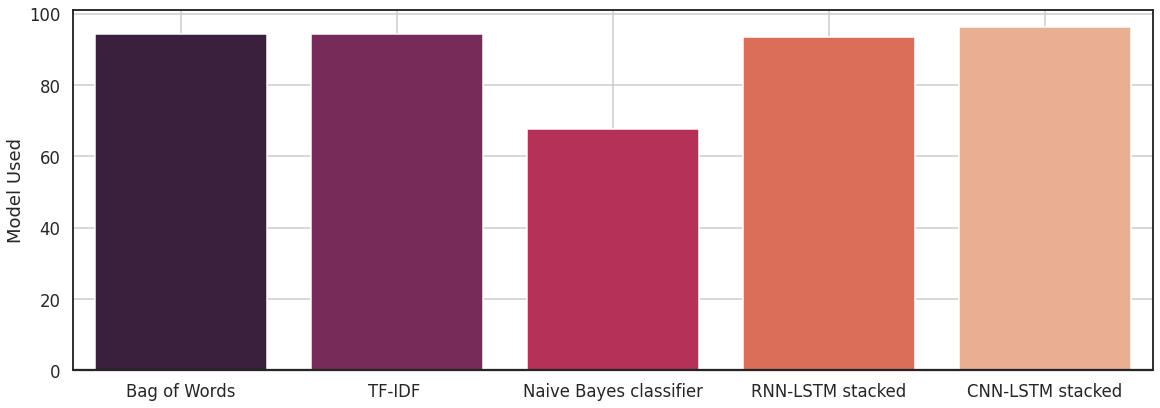

In [ ]:
#palette=",
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0,0,1,1])

# Generate some sequential data

sns.barplot(x=x, y=y,  ax=ax1,  palette="rocket")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Accuracy")
ax1.set_ylabel("Model Used")
ax1.grid(True)

**END  OF PROJECT**